Importing Required Libraries







In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


Load the Dataset




In [6]:
import pandas as pd
import os

# Print the current working directory
print("Current Working Directory:", os.getcwd())

# Load datasets from the project directory
training_set = pd.read_csv('dataset/UNSW_NB15_training-set.csv')
testing_set = pd.read_csv('dataset/UNSW_NB15_testing-set.csv')
LIST_EVENTS = pd.read_csv('dataset/UNSW-NB15_LIST_EVENTS.csv')
NB15_1 = pd.read_csv('dataset/UNSW-NB15_1.csv')
NB15_2 = pd.read_csv('dataset/UNSW-NB15_2.csv')
NB15_3 = pd.read_csv('dataset/UNSW-NB15_3.csv')
NB15_4 = pd.read_csv('dataset/UNSW-NB15_4.csv')
NB15_features = pd.read_csv('dataset/NUSW-NB15_features.csv', encoding='cp1252')


Current Working Directory: c:\Users\safac\IDS


C:\Users\safac\AppData\Local\Temp\ipykernel_10776\2752492668.py:11: DtypeWarning: Columns (1,3,47) have mixed types. Specify dtype option on import or set low_memory=False.
  NB15_1 = pd.read_csv('dataset/UNSW-NB15_1.csv')
C:\Users\safac\AppData\Local\Temp\ipykernel_10776\2752492668.py:12: DtypeWarning: Columns (3,39,47) have mixed types. Specify dtype option on import or set low_memory=False.
  NB15_2 = pd.read_csv('dataset/UNSW-NB15_2.csv')


Check the structure and contents of the datasets

In [7]:
# Display basic info about the datasets
print("Training Data Info:")
print(training_set.info())

print("\nTesting Data Info:")
print(testing_set.info())

# Optionally, display the first few rows
print("\nFirst few rows of training data:")
display(training_set.head())

print("\nFirst few rows of testing data:")
display(testing_set.head())

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-n

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0



First few rows of testing data:


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


Understanding of the features

In [8]:
NB15_features

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol
5,6,state,nominal,Indicates to the state and its dependent proto...
6,7,dur,Float,Record total duration
7,8,sbytes,Integer,Source to destination transaction bytes
8,9,dbytes,Integer,Destination to source transaction bytes
9,10,sttl,Integer,Source to destination time to live value


Concatenation of the Data

In [9]:
NB15_1.columns = NB15_features['Name']
NB15_2.columns = NB15_features['Name']
NB15_3.columns = NB15_features['Name']
NB15_4.columns = NB15_features['Name']

In [10]:
training_set = pd.concat([NB15_1, NB15_2, NB15_3, NB15_4], ignore_index=True)

In [11]:
# Shuffle the data points in train_df
training_set = training_set.sample(frac=1, random_state=42).reset_index(drop=True)

In [27]:
training_set.head()

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,175.45.176.3,57672,149.171.126.15,3260,tcp,CON,0.285356,986,86,62,...,,10,8,4,5,3,1,7,NaN,0
1,59.166.0.8,38052,149.171.126.9,6881,tcp,FIN,0.314311,1540,1644,31,...,,14,6,8,12,5,1,6,NaN,0
2,59.166.0.0,42911,149.171.126.2,38558,udp,CON,0.301180,536,304,31,...,0,9,16,7,6,1,1,3,NaN,0
3,175.45.176.1,47439,149.171.126.14,53,udp,INT,0.000009,114,0,254,...,,33,33,17,17,17,17,33,Generic,1
4,59.166.0.5,61544,149.171.126.6,53,udp,CON,0.001079,146,178,31,...,,2,2,5,4,1,1,1,NaN,0


Dimension of Dataset

In [12]:
# Print dimensions of the datasets
print("Training Data Dimensions (rows, columns):", training_set.shape)
print("Testing Data Dimensions (rows, columns):", testing_set.shape)

Training Data Dimensions (rows, columns): (2540043, 49)
Testing Data Dimensions (rows, columns): (82332, 45)


Identifying data quality issues


1.Check for missing data

In [13]:
# Check for missing values in both training and testing datasets
print("Missing values in Training Data:")
print(training_set.isnull().sum())

print("\nMissing values in Testing Data:")
print(testing_set.isnull().sum())

Missing values in Training Data:
Name
srcip                     0
sport                     0
dstip                     0
dsport                    0
proto                     0
state                     0
dur                       0
sbytes                    0
dbytes                    0
sttl                      0
dttl                      0
sloss                     0
dloss                     0
service                   0
Sload                     0
Dload                     0
Spkts                     0
Dpkts                     0
swin                      0
dwin                      0
stcpb                     0
dtcpb                     0
smeansz                   0
dmeansz                   0
trans_depth               0
res_bdy_len               0
Sjit                      0
Djit                      0
Stime                     0
Ltime                     0
Sintpkt                   0
Dintpkt                   0
tcprtt                    0
synack                    0
ackdat    

2.Check for Redundant Data

In [14]:
print("Duplicates in training_set: ",training_set.duplicated().sum())

Duplicates in training_set:  480626


3.Detect Outliers:

We can look at the statistical summary of the data, and for each numerical column, we can check for unusually high or low values by identifying those beyond a certain range

In [32]:
# Statistical summary for training data
print("Statistical Summary of Training Data:")
display(training_set.describe())

# Statistical summary for testing data
print("\nStatistical Summary of Testing Data:")
display(testing_set.describe())

Statistical Summary of Training Data:


Name,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Sload,Dload,Spkts,...,ct_flw_http_mthd,is_ftp_login,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,Label
count,2.540043e+06,2.540043e+06,2.540043e+06,2.540043e+06,2.540043e+06,2.540043e+06,2.540043e+06,2.540043e+06,2.540043e+06,2.540043e+06,...,1.191900e+06,1.110166e+06,2.540043e+06,2.540043e+06,2.540043e+06,2.540043e+06,2.540043e+06,2.540043e+06,2.540043e+06,2.540043e+06
mean,6.587925e-01,4.339589e+03,3.642760e+04,6.278202e+01,3.076681e+01,5.163917e+00,1.632944e+01,3.695650e+07,2.450860e+06,3.328882e+01,...,2.345860e-01,3.969947e-02,9.206993e+00,8.988962e+00,6.439107e+00,6.900989e+00,4.642145e+00,3.592733e+00,6.845894e+00,1.264872e-01
std,1.392494e+01,5.640604e+04,1.610962e+05,7.462281e+01,4.285092e+01,2.251709e+01,5.659479e+01,1.186044e+08,4.224865e+06,7.628393e+01,...,7.940930e-01,1.996591e-01,1.083676e+01,1.082250e+01,8.162039e+00,8.205068e+00,8.477584e+00,6.174449e+00,1.125829e+01,3.323977e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.037000e-03,2.000000e+02,1.780000e+02,3.100000e+01,2.900000e+01,0.000000e+00,0.000000e+00,1.353955e+05,1.191580e+04,2.000000e+00,...,0.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
50%,1.586100e-02,1.470000e+03,1.820000e+03,3.100000e+01,2.900000e+01,3.000000e+00,4.000000e+00,5.893038e+05,5.893179e+05,1.200000e+01,...,0.000000e+00,0.000000e+00,5.000000e+00,5.000000e+00,3.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00
75%,2.145650e-01,3.182000e+03,1.489400e+04,3.100000e+01,2.900000e+01,7.000000e+00,1.400000e+01,2.039923e+06,2.925945e+06,4.400000e+01,...,0.000000e+00,0.000000e+00,1.000000e+01,1.000000e+01,6.000000e+00,7.000000e+00,2.000000e+00,1.000000e+00,5.000000e+00,0.000000e+00
max,8.786638e+03,1.435577e+07,1.465753e+07,2.550000e+02,2.540000e+02,5.319000e+03,5.507000e+03,5.988000e+09,1.287619e+08,1.064600e+04,...,3.600000e+01,4.000000e+00,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.000000e+01,6.700000e+01,1.000000e+00



Statistical Summary of Testing Data:


,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,82332.000000,8.233200e+04,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,41166.500000,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,95.713003,6.454902e+07,...,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,0.550600
std,23767.345519,4.710444,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,116.667722,1.798618e+08,...,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,0.497436
min,1.000000,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,20583.750000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,0.000000,1.120247e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,41166.500000,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,29.000000,5.770032e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,61749.250000,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,252.000000,6.514286e+07,...,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,82332.000000,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,253.000000,5.268000e+09,...,59.000000,38.000000,63.000000,2.000000,2.000000,16.000000,60.000000,62.000000,1.000000,1.000000


4.Class Imbalance:

We will check for class imbalance using the 'label' column, which seems to represent whether a record is normal or an attack. Additionally, we'll inspect the 'attack_cat' column to check the distribution of attack types.

In [34]:
# Check class distribution in the training set
print("Class distribution in Training Data ('label' column):")
print(training_set['Label'].value_counts())

# Check attack categories distribution in the training set
print("\nAttack categories distribution in Training Data ('attack_cat' column):")
print(training_set['attack_cat'].value_counts())

# Check class distribution in the testing set
print("\nClass distribution in Testing Data ('label' column):")
print(testing_set['label'].value_counts())

# Check attack categories distribution in the testing set
print("\nAttack categories distribution in Testing Data ('attack_cat' column):")
print(testing_set['attack_cat'].value_counts())

Class distribution in Training Data ('label' column):
Label
0    2218760
1     321283
Name: count, dtype: int64

Attack categories distribution in Training Data ('attack_cat' column):
attack_cat
Generic             215481
Exploits             44525
 Fuzzers             19195
DoS                  16353
 Reconnaissance      12228
 Fuzzers              5051
Analysis              2677
Backdoor              1795
Reconnaissance        1759
 Shellcode            1288
Backdoors              534
Shellcode              223
Worms                  174
Name: count, dtype: int64

Class distribution in Testing Data ('label' column):
label
1    45332
0    37000
Name: count, dtype: int64

Attack categories distribution in Testing Data ('attack_cat' column):
attack_cat
Normal            37000
Generic           18871
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Analysis            677
Backdoor            583
Shellcode           378
Worms                4

Analysing Feature distributions

1. Examine the Distribution of Attack Classes and Normal Class


We have a column that labels each record as either a "normal" instance or one of several attack types (e.g., DoS, Probe, etc.). We will examine the distribution of these categories.

Class distribution (normal vs attack) in Training Data:
Label
0    2218760
1     321283
Name: count, dtype: int64


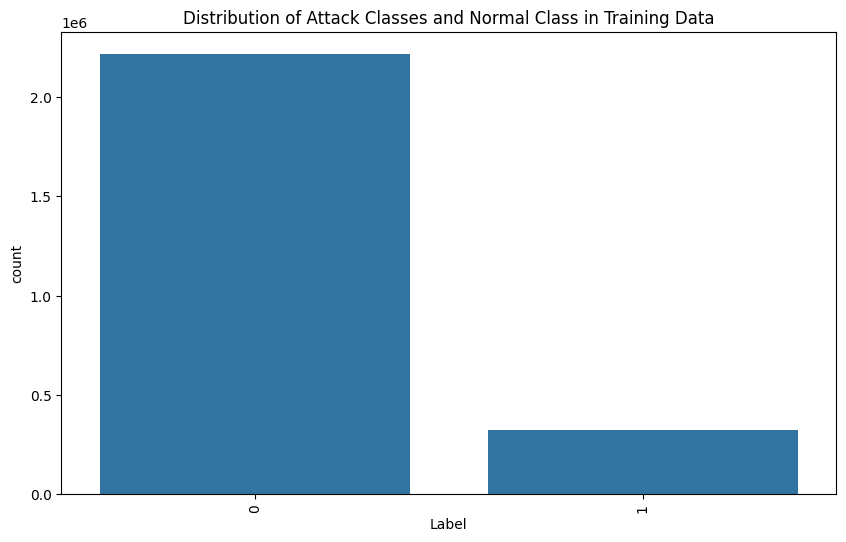

In [37]:
# Assuming the target label column is named 'label' and contains both normal and attack class info
if 'Label' in training_set.columns:
    print("Class distribution (normal vs attack) in Training Data:")
    print(training_set['Label'].value_counts())

    # Plot the distribution of classes
    import matplotlib.pyplot as plt
    import seaborn as sns

    plt.figure(figsize=(10, 6))
    sns.countplot(data=training_set, x='Label', order=training_set['Label'].value_counts().index)
    plt.xticks(rotation=90)
    plt.title('Distribution of Attack Classes and Normal Class in Training Data')
    plt.show()

2. Check for Imbalances Between Different Attack Classes


If the label column contains both normal and attack classes, we will want to check how many samples are available for each specific attack class. This can help identify if some attack classes are underrepresented or overrepresented.


Attack Type Distribution in Training Data:
attack_cat
Generic             215481
Exploits             44525
 Fuzzers             19195
DoS                  16353
 Reconnaissance      12228
 Fuzzers              5051
Analysis              2677
Backdoor              1795
Reconnaissance        1759
 Shellcode            1288
Backdoors              534
Shellcode              223
Worms                  174
Name: count, dtype: int64


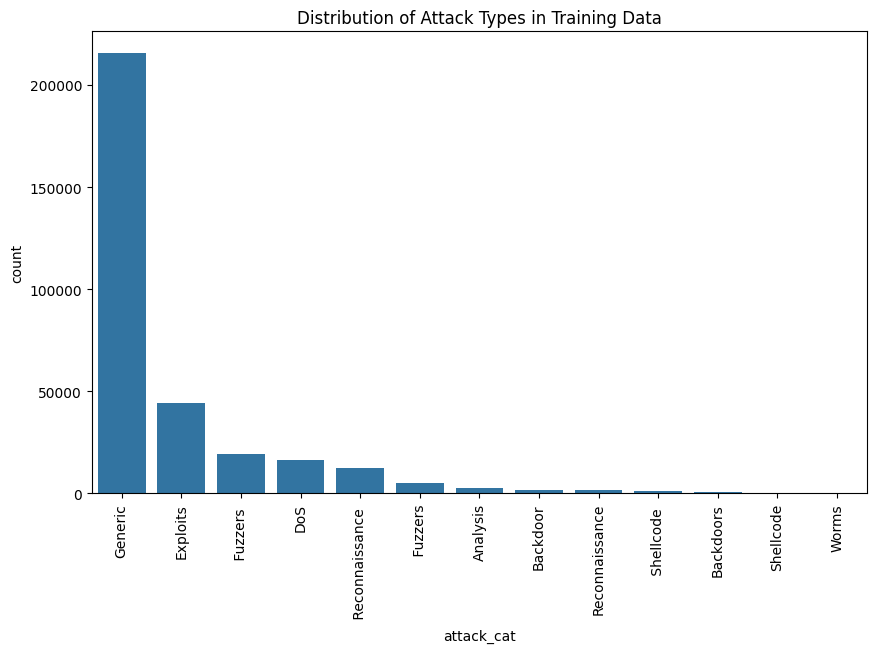

In [39]:
# Check the breakdown of different attack classes
if 'attack_cat' in training_set.columns:
    print("\nAttack Type Distribution in Training Data:")
    print(training_set['attack_cat'].value_counts())

    # Plot attack type distribution
    plt.figure(figsize=(10, 6))
    sns.countplot(data=training_set, x='attack_cat', order=training_set['attack_cat'].value_counts().index)
    plt.xticks(rotation=90)
    plt.title('Distribution of Attack Types in Training Data')
    plt.show()

3. Explore Features Like proto or service


Certain features such as proto
 (protocol) and service might show clustering around certain values. Let's explore their distributions to understand their role in the dataset:


Protocol Distribution in Training Data:
proto
tcp           1495071
udp            990434
unas            16202
arp             10064
ospf             7798
               ...   
sprite-rpc        137
igmp               64
udt                 8
rtp                 7
esp                 2
Name: count, Length: 135, dtype: int64


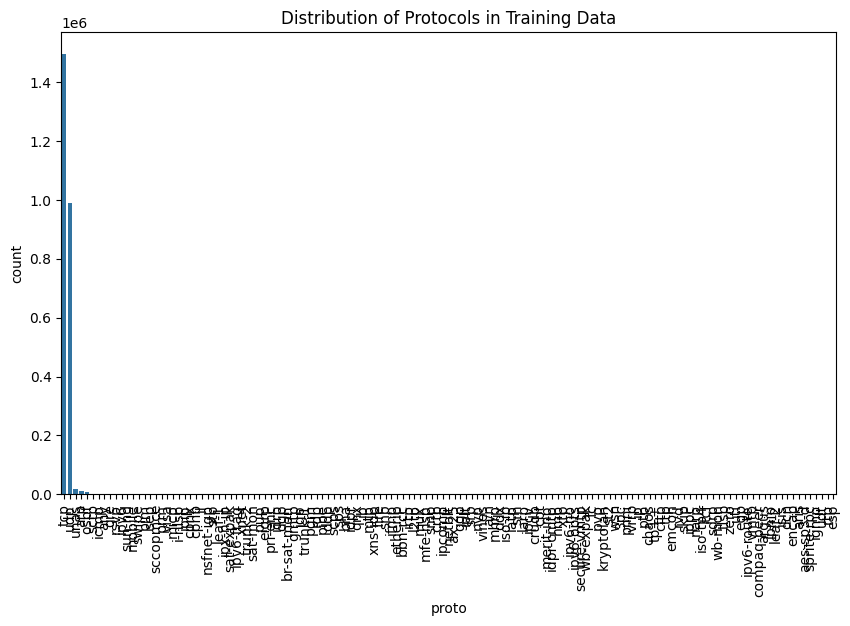


Service Distribution in Training Data:
service
-           1246395
dns          781667
http         206273
ftp-data     125783
smtp          81644
ftp           49090
ssh           47160
pop3           1533
dhcp            172
ssl             142
snmp            113
radius           40
irc              31
Name: count, dtype: int64


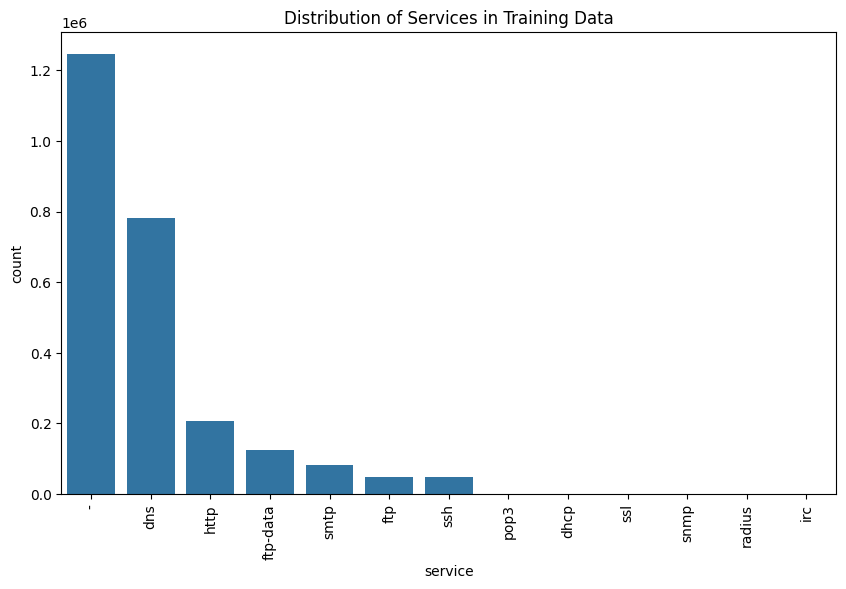

In [41]:
#Examine protocol distribution
if 'proto' in training_set.columns:
    print("\nProtocol Distribution in Training Data:")
    print(training_set['proto'].value_counts())

    # Plot protocol distribution
    plt.figure(figsize=(10, 6))
    sns.countplot(data=training_set, x='proto', order=training_set['proto'].value_counts().index)
    plt.xticks(rotation=90)
    plt.title('Distribution of Protocols in Training Data')
    plt.show()

# Examine service distribution (if available)
if 'service' in training_set.columns:
    print("\nService Distribution in Training Data:")
    print(training_set['service'].value_counts())

    # Plot service distribution
    plt.figure(figsize=(10, 6))
    sns.countplot(data=training_set, x='service', order=training_set['service'].value_counts().index)
    plt.xticks(rotation=90)
    plt.title('Distribution of Services in Training Data')
    plt.show()

4. Check Clustering Around Specific Values


To check if proto or service clusters around specific values, we can analyze the relationship between these features and the attack classes:



In [44]:
# Cross-tabulate proto with attack classes
if 'Label' in training_set.columns and 'proto' in training_set.columns:
    proto_attack_distribution = pd.crosstab(training_set['proto'], training_set['Label'])
    print("\nProtocol vs Attack Type Cross-tab:")
    print(proto_attack_distribution)

# Cross-tabulate service with attack classes (if service feature exists)
if 'Label' in training_set.columns and 'service' in training_set.columns:
    service_attack_distribution = pd.crosstab(training_set['service'], training_set['Label'])
    print("\nService vs Attack Type Cross-tab:")
    print(service_attack_distribution)


Protocol vs Attack Type Cross-tab:
Label      0    1
proto            
3pc        0  137
a/n        0  137
aes-sp3-d  0  137
any        0  411
argus      0  137
...       ..  ...
wsn        0  137
xnet       0  137
xns-idp    0  137
xtp        0  137
zero       0  137

[135 rows x 2 columns]

Service vs Attack Type Cross-tab:
Label           0       1
service                  
-         1166518   79877
dhcp            0     172
dns        571036  210631
ftp         46075    3015
ftp-data   123893    1890
http       187426   18847
irc             1      30
pop3            4    1529
radius         10      30
smtp        76655    4989
snmp            1     112
ssh         47141      19
ssl             0     142


Correlation Matrix

Highly Correlated Features:
           Feature 1         Feature 2  Correlation
0              sloss            sbytes     0.953492
1              dloss            dbytes     0.991342
2              Dpkts            dbytes     0.970808
3              Dpkts             dloss     0.992163
4               dwin              swin     0.997207
5              Ltime             Stime     1.000000
6             synack            tcprtt     0.931305
7             ackdat            tcprtt     0.918899
8       ct_state_ttl              sttl     0.906061
9         ct_srv_dst        ct_srv_src     0.956734
10       ct_src_ ltm        ct_dst_ltm     0.938519
11  ct_src_dport_ltm        ct_dst_ltm     0.960154
12  ct_src_dport_ltm       ct_src_ ltm     0.945332
13  ct_dst_sport_ltm  ct_src_dport_ltm     0.921490
14    ct_dst_src_ltm        ct_srv_src     0.942175
15    ct_dst_src_ltm        ct_srv_dst     0.951026
16    ct_dst_src_ltm  ct_src_dport_ltm     0.910894
17             Label              st

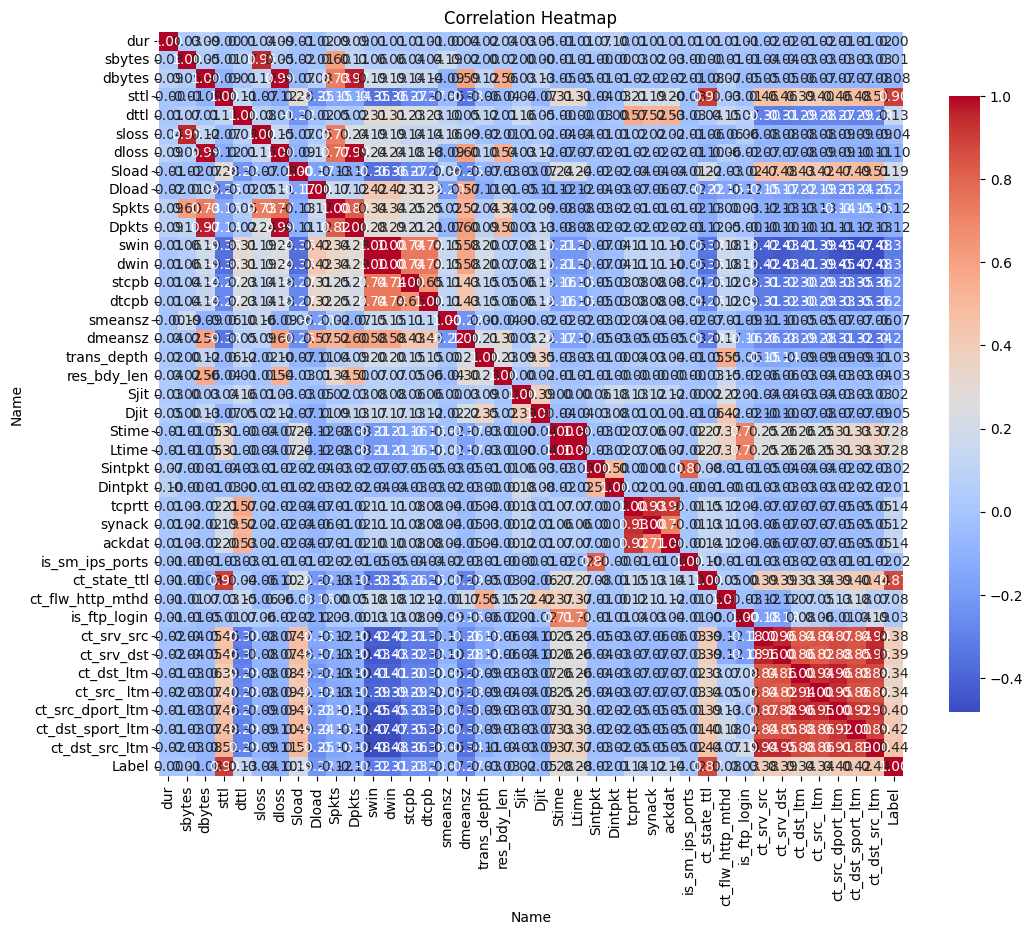

In [47]:
# Step 1: Select only numeric columns
numeric_columns = training_set.select_dtypes(include=[np.number]).columns
numeric_data = training_set[numeric_columns]

# Step 2: Compute the correlation matrix
corr_matrix = numeric_data.corr()

# Step 3: Identify highly correlated features
threshold = 0.9
high_corr_pairs = []

# Loop through the correlation matrix to find highly correlated pairs
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))
            # Convert to DataFrame for better visualization
high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Feature 1', 'Feature 2', 'Correlation'])

# Print highly correlated features
print("Highly Correlated Features:")
print(high_corr_df)

# Step 4: Visualize the Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.show()


Principal Component Analysis (PCA)


==> a powerful dimensionality reduction technique that can help identify the most relevant features in a dataset, especially when dealing with high-dimensional data like intrusion detection datasets.

 By projecting the data into a lower-dimensional space, PCA allows you to capture the most variance with fewer features, which can be useful for improving model performance and interpretability.

In [55]:
from sklearn.impute import SimpleImputer

# Create an imputer to fill NaN values with the mean of each column
imputer = SimpleImputer(strategy='mean')

# Fit the imputer and transform the data
numeric_data_imputed = imputer.fit_transform(numeric_data)


    Principal Component  Explained Variance  Cumulative Variance
0                     1        2.403246e-01             0.240325
1                     2        1.115184e-01             0.351843
2                     3        9.068921e-02             0.442532
3                     4        6.009268e-02             0.502625
4                     5        5.703337e-02             0.559658
5                     6        4.928500e-02             0.608943
6                     7        4.750569e-02             0.656449
7                     8        4.287873e-02             0.699328
8                     9        3.958694e-02             0.738915
9                    10        3.033869e-02             0.769253
10                   11        2.852368e-02             0.797777
11                   12        2.519233e-02             0.822969
12                   13        2.435364e-02             0.847323
13                   14        2.190673e-02             0.869230
14                   15  

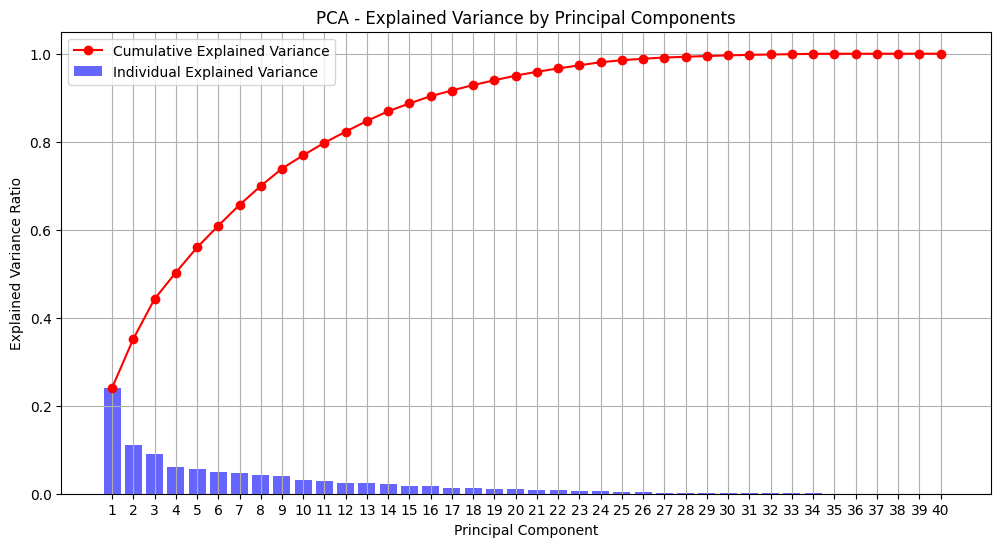

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 1: Select only numeric columns
numeric_columns = training_set.select_dtypes(include=[np.number]).columns
numeric_data = training_set[numeric_columns]

# Step 2: Handle missing values with mean imputation
imputer = SimpleImputer(strategy='mean')
numeric_data_imputed = imputer.fit_transform(numeric_data)

# Step 3: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data_imputed)

# Step 4: Apply PCA
pca = PCA()
pca.fit(scaled_data)

# Step 5: Analyze the results
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Create a DataFrame to hold the explained variance
explained_variance_df = pd.DataFrame({
    'Principal Component': np.arange(1, len(explained_variance) + 1),
    'Explained Variance': explained_variance,
    'Cumulative Variance': cumulative_variance
})

# Print explained variance
print(explained_variance_df)

# Step 6: Visualize explained variance
plt.figure(figsize=(12, 6))
plt.bar(explained_variance_df['Principal Component'], explained_variance_df['Explained Variance'], alpha=0.6, color='b', label='Individual Explained Variance')
plt.plot(explained_variance_df['Principal Component'], explained_variance_df['Cumulative Variance'], marker='o', color='r', label='Cumulative Explained Variance')
plt.title('PCA - Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(np.arange(1, len(explained_variance_df) + 1))
plt.legend()
plt.grid()
plt.show()
